In [79]:
# Importtando bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [83]:
# Carregando o conjunto de dados

# Caminho para o arquivo ZIP

zip_path = 'news.csv.zip'

# Nome do arquivo CSV dentro do ZIP

csv_filename = 'news.csv'

# Lendo o CSV dentro do ZIP
with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open(csv_filename) as f:
        data = pd.read_csv(f)

In [84]:
# Dividindo os dados em conjuntos de treinamento e teste

x_train, x_test, y_train, y_test = train_test_split(data['text'], 
                                                    labels, 
                                                    test_size = 0.2, 
                                                    random_state = 42
                                                   )

In [85]:
# Inicializando um TF-IDF Vectorizer
# Transformando os textos em vetores que os modelos de aprendizado de máquina conseguem entender, 
# transforma textos em uma representação numérica considerando a frequência das palavras no documento 
# e em todo o conjunto de dados

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df = 0.7)
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

In [86]:
# Treinando o modelo PassiveAggressiveClassifier

pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

Acurácia do modelo: 0.94


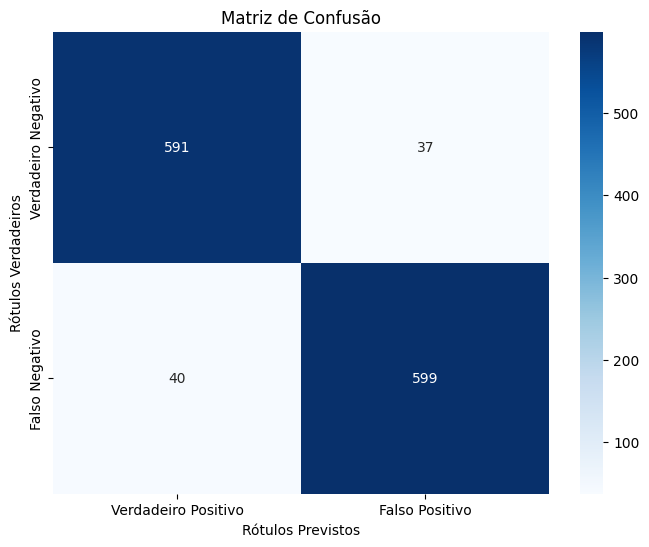

Notícias verdadeiras corretamente identificadas como verdadeiras: 591
Notícias verdadeiras identificadas incorretamente como falsas: 40
Notícias falsas identificadas incorretamente como verdadeiras: 37
Notícias falsas corretamente identificadas como falsas: 599


In [87]:
y_pred = pac.predict(tfidf_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Acurácia do modelo: {accuracy:.2f}")

# Plotando a matriz de confusão com Seaborn

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
           xticklabels = ['Verdadeiro Positivo', 'Falso Positivo'],
           yticklabels = ['Verdadeiro Negativo', 'Falso Negativo'])
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

# Extraindo Resultados da Matriz de Confusão
vp = cm[0][0]
fp = cm[0][1]
vn = cm[1][1]
fn = cm[1][0]

# Imprimindo legendas

print(f"Notícias verdadeiras corretamente identificadas como verdadeiras: {vp}")
print(f"Notícias verdadeiras identificadas incorretamente como falsas: {fn}")
print(f"Notícias falsas identificadas incorretamente como verdadeiras: {fp}")
print(f"Notícias falsas corretamente identificadas como falsas: {vn}")